# <font color="red"><h1 align="center"><b>IRIS - Flower ML Classification</b></h1></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
iris=pd.read_csv("iris.csv")

iris.drop(columns='Unnamed: 0', inplace=True)

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking for null values

iris.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
n = len(iris[iris['Species'] == 'versicolor'])

print("No of Versicolor in Dataset : ", n)

No of Versicolor in Dataset :  50


In [10]:
n1 = len(iris[iris['Species'] == 'virginica'])

print("No of Virginica in Dataset : ", n1)

No of Virginica in Dataset :  50


In [11]:
n2 = len(iris[iris['Species'] == 'setosa'])

print("No of Setosa in Dataset : ", n2)

No of Setosa in Dataset :  50


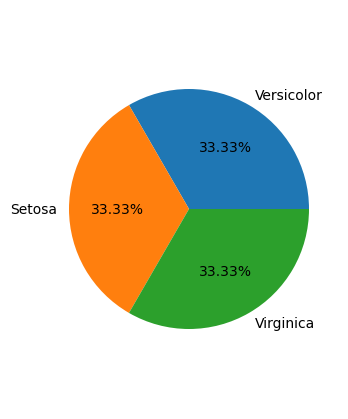

In [12]:
fig = plt.figure(figsize=(3,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [n, n2, n1]
ax.pie(s, labels = l, autopct='%1.2f%%')
plt.show()

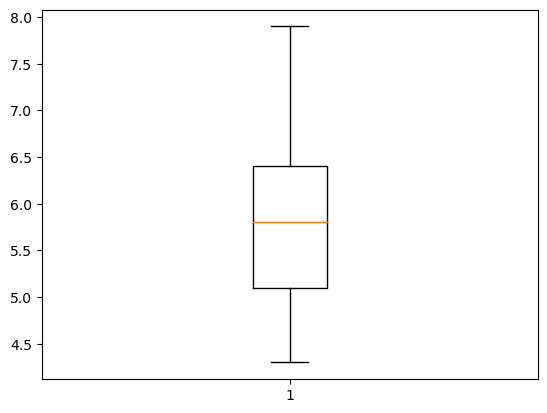

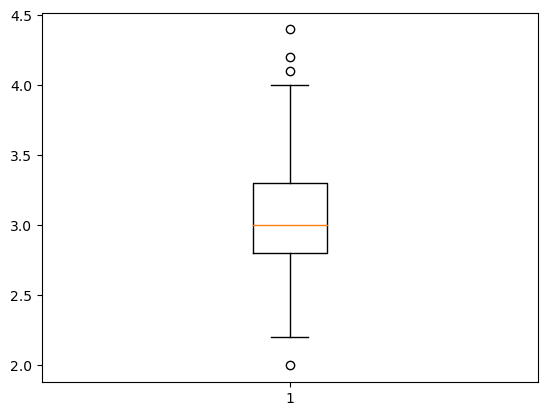

In [13]:
#Checking for outliars

plt.figure(1)
plt.boxplot([iris['Sepal.Length']])

plt.figure(2)
plt.boxplot([iris['Sepal.Width']])

plt.show()

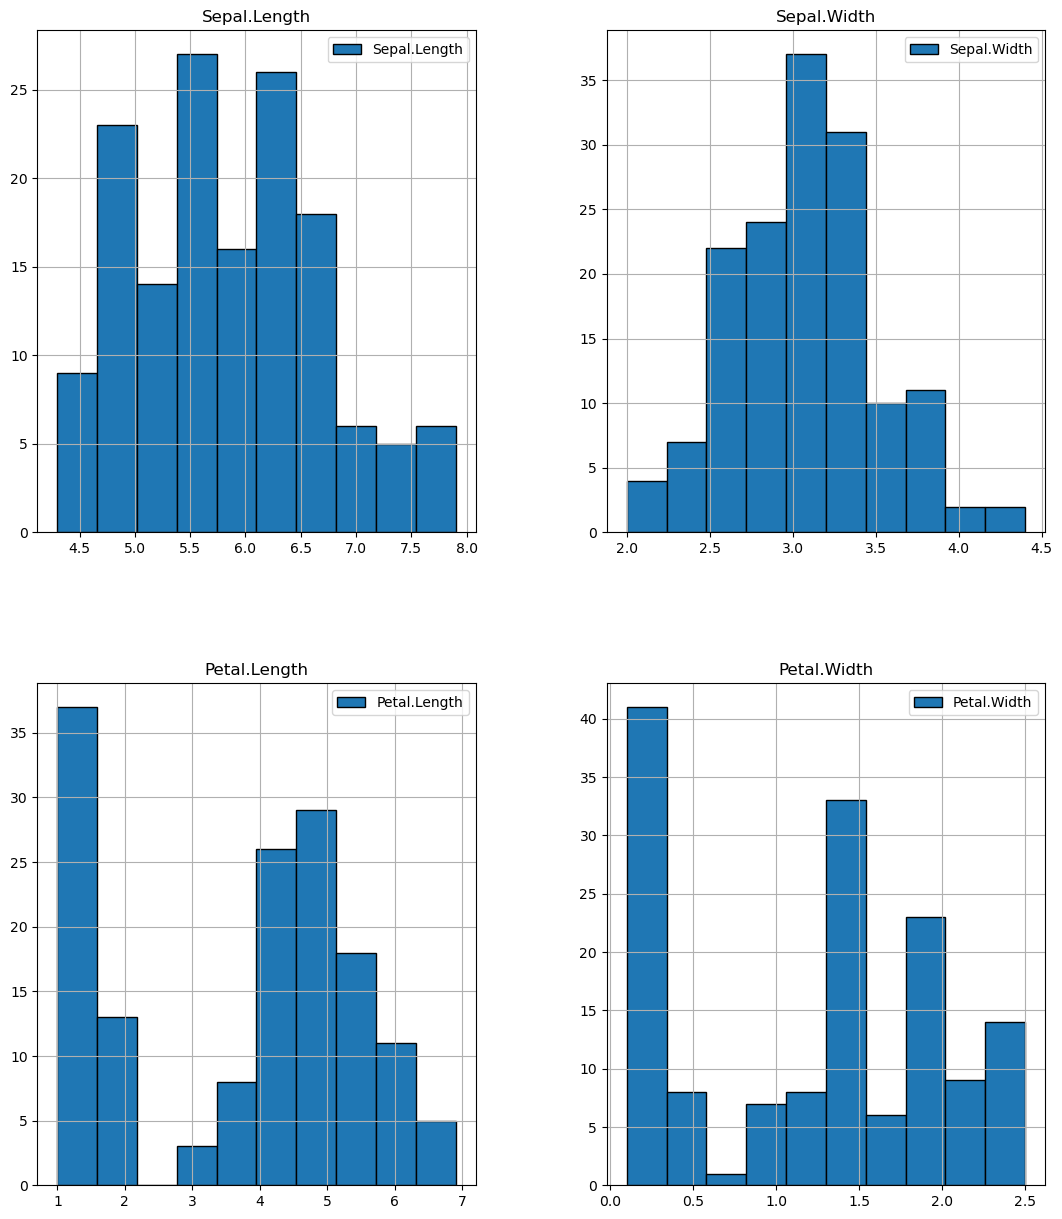

In [14]:
iris.hist(figsize=(13, 15), legend=True, edgecolor = "black")
plt.show()

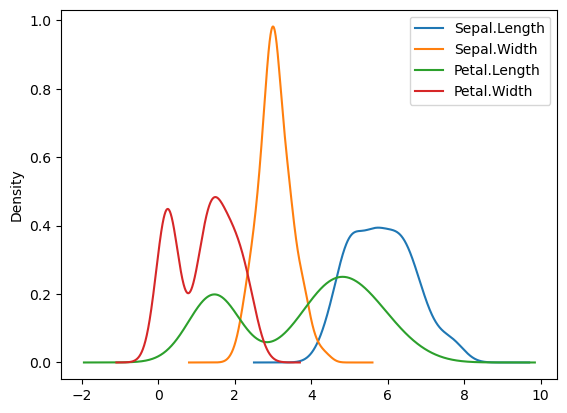

In [15]:
iris.plot(kind ='density', subplots = False, sharex = False);

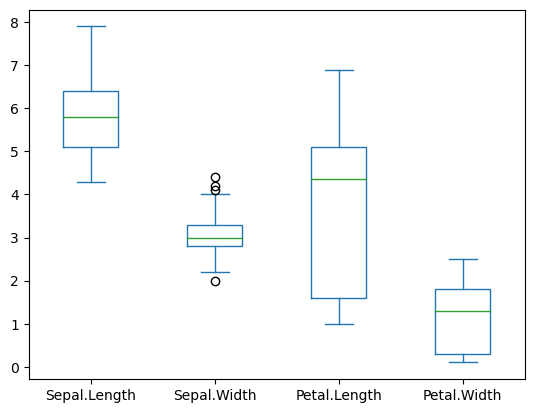

In [16]:
iris.plot(kind ='box',subplots = False, sharex = False);

<Axes: xlabel='Species', ylabel='Sepal.Width'>

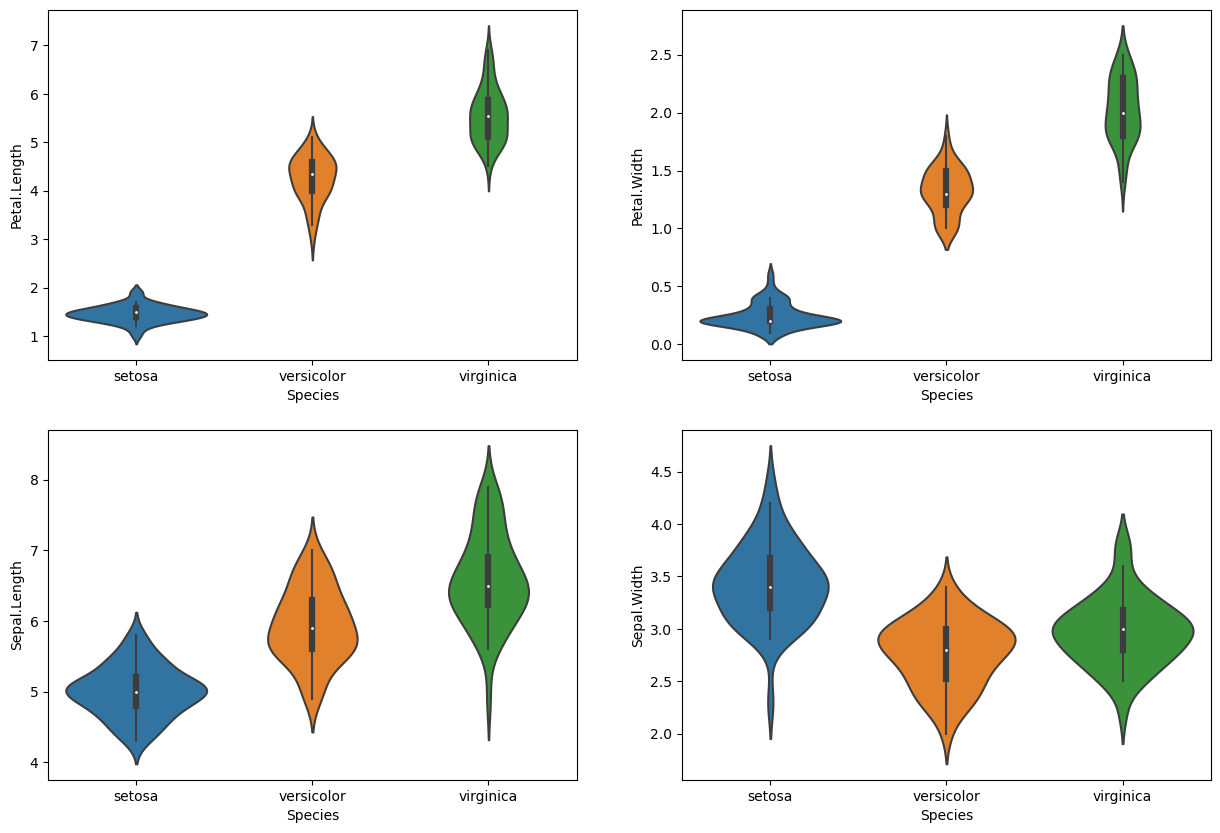

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal.Length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal.Width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal.Length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal.Width',data=iris)

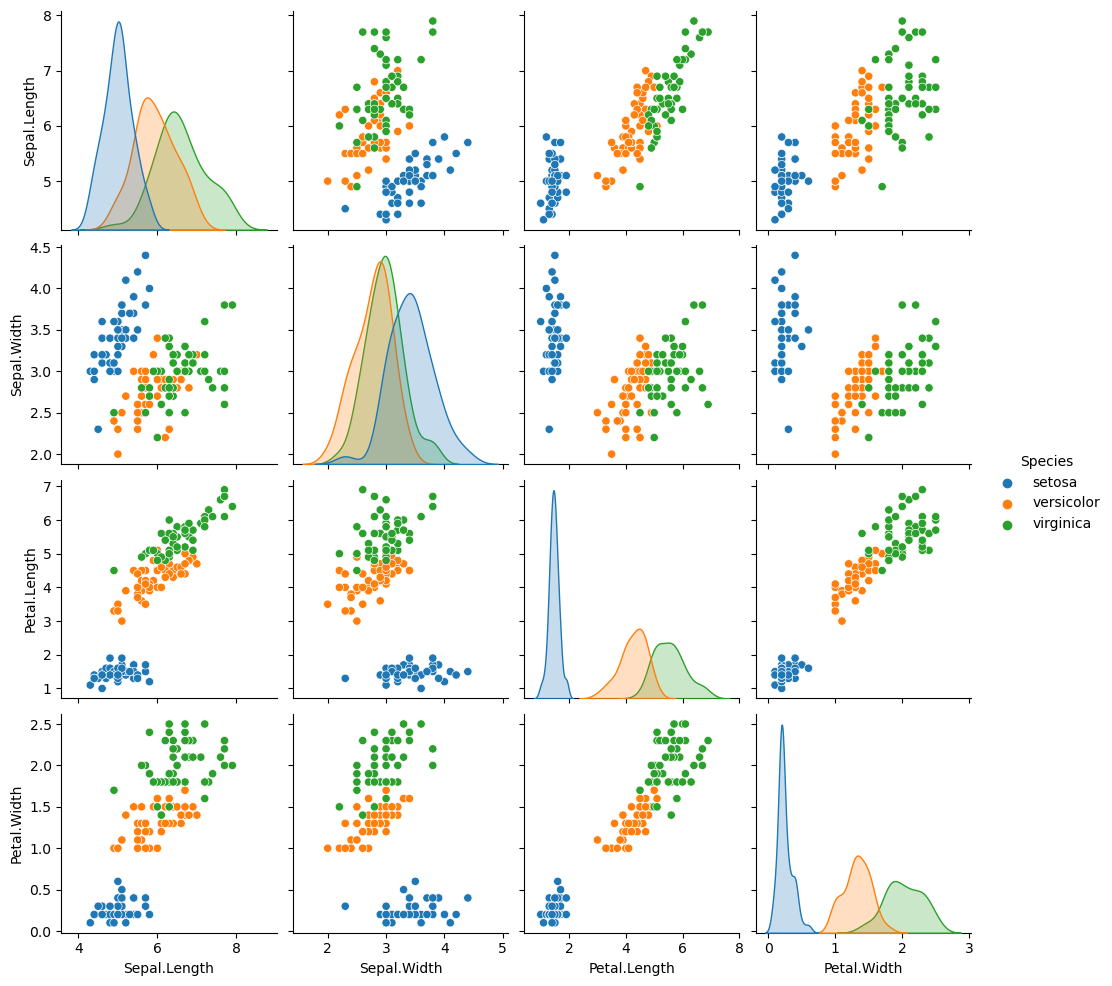

In [18]:
sns.pairplot(iris,hue='Species');

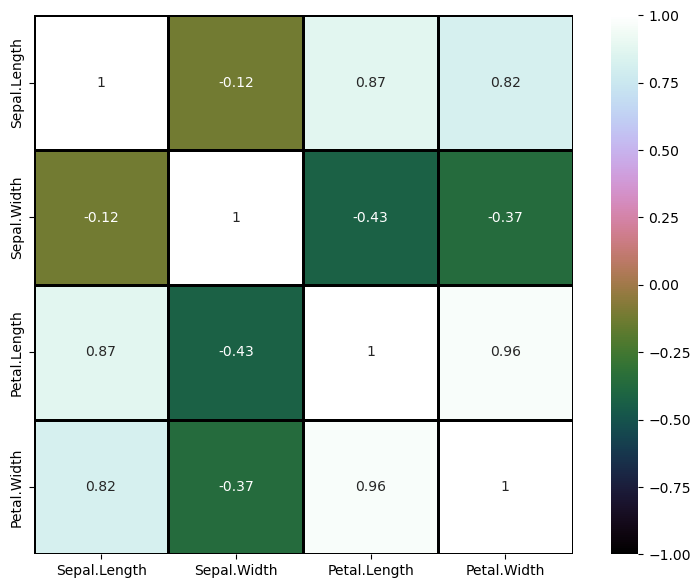

In [19]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [20]:
X = iris['Sepal.Length'].values.reshape(-1,1)
X[:10]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9]])

In [21]:
Y = iris['Sepal.Width'].values.reshape(-1,1)
Y[:10]

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1]])

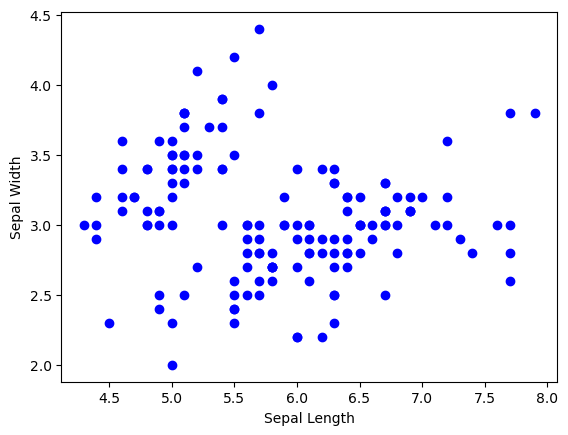

In [22]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [23]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [25]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [26]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

In [27]:
train_X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
20,5.4,3.4,1.7,0.2
113,5.7,2.5,5.0,2.0
15,5.7,4.4,1.5,0.4
146,6.3,2.5,5.0,1.9
102,7.1,3.0,5.9,2.1


In [28]:
test_y.head()

39         setosa
112     virginica
98     versicolor
89     versicolor
33         setosa
Name: Species, dtype: object

In [29]:
test_y.head()

39         setosa
112     virginica
98     versicolor
89     versicolor
33         setosa
Name: Species, dtype: object

In [30]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [31]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[11  0  0]
 [ 0 11  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [32]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9473684210526315


In [33]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9473684210526315


In [34]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9473684210526315


In [35]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


In [36]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


In [37]:
#Hence I will use Naive Bayes algorithms for training my model.